In [52]:
import pandas as pd
#récupération du df nettoyé
data = pd.read_pickle("data_cleaned.pkl")



# Projet 2 : Explorer et comprendre les performances des employés  

## Problématique métier:  
Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.  
  
  
## Objectif:  
Étudier les distributions des scores de performance pour détecter les facteurs d'amélioration.

## Etapes: 
1/Exploration du fichier et nettoyage des données.  
2/Choix des indicateurs  
3/Statistiques descriptives : Moyenne, médiane, mode, quartiles, variance, écart-type   
4/Visualisation des distributions   


In [53]:
stats_descriptives=data.describe()
stats_descriptives

,EmpID,GenderID,PerfScoreID,Salary,PositionID,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,10156.000000,0.434084,2.983923,69020.684887,16.845659,6555.482315,1979-02-06 09:48:02.315112544,2013-02-03,2015-06-14,15.199357,4.110000,3.890675,1.218650,2017-09-10,0.414791,10.237942
min,10001.000000,0.000000,1.000000,45046.000000,1.000000,1013.000000,1951-01-02 00:00:00,2006-01-09,2010-08-30,1.000000,1.120000,1.000000,0.000000,2010-07-14,0.000000,1.000000
25%,10078.500000,0.000000,3.000000,55501.500000,18.000000,1901.500000,1973-12-03 00:00:00,2011-07-11,2014-01-10,10.000000,3.690000,3.000000,0.000000,2016-03-19,0.000000,5.000000
50%,10156.000000,0.000000,3.000000,62810.000000,19.000000,2132.000000,1980-09-30 00:00:00,2013-02-18,2015-09-22,16.000000,4.280000,4.000000,0.000000,2019-01-16,0.000000,10.000000
75%,10233.500000,1.000000,3.000000,72036.000000,20.000000,2355.000000,1986-05-29 12:00:00,2014-09-23,2016-09-08,19.500000,4.700000,5.000000,0.000000,2019-02-04,0.000000,15.000000
max,10311.000000,1.000000,4.000000,250000.000000,30.000000,98052.000000,1992-08-17 00:00:00,2018-07-09,2018-11-10,39.000000,5.000000,5.000000,8.000000,2019-02-28,6.000000,20.000000
std,89.922189,0.496435,0.576193,25156.636930,6.223419,16908.396884,NaN,NaN,NaN,8.864507,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


### Choix des indicateurs :  
L'entreprise cherche à connaître les performances des employés:  
Ici nous avons la variable 'PerfScoreID' qui va mesurer la performance.  
Pour chercher les facteurs pouvant impacter la performance on a 'EmpSatisfaction','EngagementSurvey'.  C'est indicateurs pourront eux mêmes être corrélés avec 'SpecialProjectsCount','ManagerID', 'Salary' et 'PositionID'.	

####  Choix indicateurs:  
##### Performance: 
**Mise en contexte :**  
* Nombre d'employés  
* Nombre d'embauches/ Nombre de départs sur cette année
* Ancienneté moyenne  
  
**Mesure de la performance:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* Affichage des meilleurs performers et moins bons  
* % des employés avec un score de 3 ou 4.  (objectif 3)
* % des employés avec un score de 1.  
* Affichage de la distribution des performances.  
  
**Mesure de la satisfaction et engagement:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* % des employés avec un score de 4 ou 5.  
* % des employés avec un score de 2 ou 1.  
* Affichage de la distribution de l'engagement et la satisfaction.  
  
**Mise en corrélation:**  
* Corrélation performance, satisfation, engagement. Déterminer des objectifs pour obtenir la performance de voulue.  
* Engagement et nombre de projets, manageur, salaire et poste.  
  
  





1/ Présentation de l'entreprise, à travers quelques indicateurs et présentation du contexte

In [54]:
#Mise en contexte
#nombre employés
nombre_employés=len(data.loc[data['DateofTermination'].isna()])

#embauches départs sur 2018
date_référence_N=pd.to_datetime('01/01/2018')
nombre_embauches_N=len(data.loc[data['DateofHire']>date_référence_N])
nombre_departs_N=len(data.loc[data['DateofTermination']>date_référence_N])
rapport_embauches_departs_N=nombre_embauches_N/nombre_departs_N

#ancienneté moyenne
# Convertir les colonnes en datetime64 (Pandas standard)
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])

# Calcul de la séniorité
data['Seniority'] = (data['DateofTermination'] - data['DateofHire']).where(
    data['DateofTermination'].notna(),
    pd.to_datetime('today') - data['DateofHire']
).dt.days  # Convertit en nombre de jours

ancienete_moyenne_annees=round((data['Seniority']).mean()/365.25,2)


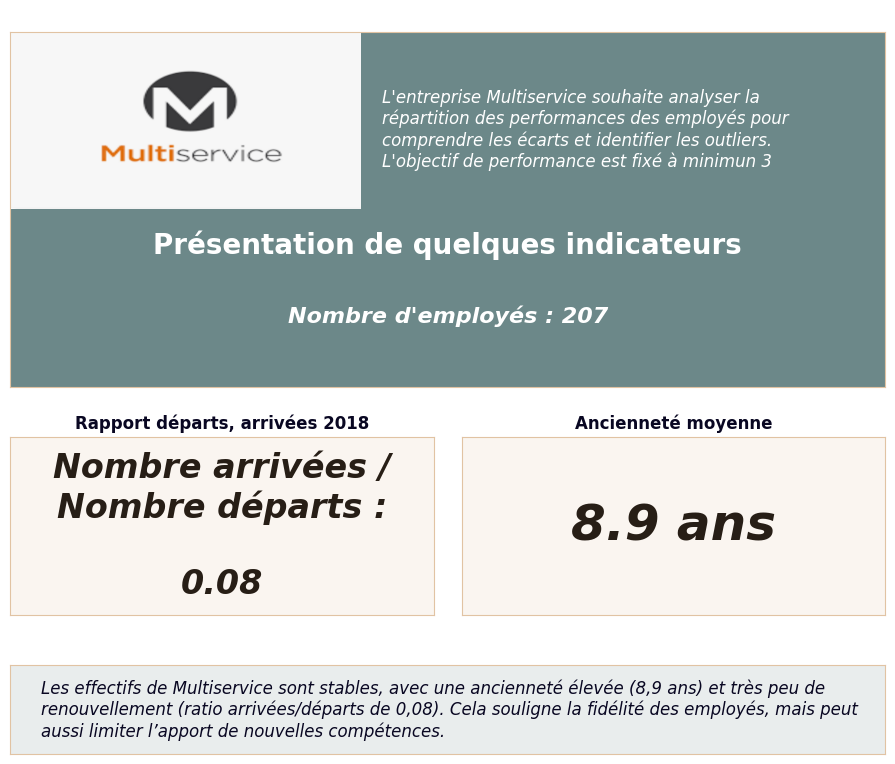

In [55]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap

# Visualisation contexte
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[2, 1, 0.5]) 

# Créer les subplots 
ax1 = fig.add_subplot(gs[0, :])  # Premier subplot en haut  
ax2 = fig.add_subplot(gs[1, 0])  # Deuxième subplot en bas à gauche 
ax3 = fig.add_subplot(gs[1, 1])   # Troisième subplot en bas à droite
ax3b = fig.add_subplot(gs[2, :]) #Conclusion

for ax in [ax1, ax2, ax3, ax3b]: #enlever les axes sans enlever la couleur de fond 
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():  # Supprime les bordures des subplots
        spine.set_color((225/255,195/255,163/255)) #almond


ax1.set_title('Description projet', color='white', weight='bold')
ax1.patch.set_facecolor((108/255,136/255,137/255))
ax2.set_title('Rapport départs, arrivées 2018', color=(9/255,7/255,34/255), weight='bold')
ax2.set_facecolor((250/255, 245/255, 240/255))
ax3.set_title('Ancienneté moyenne', color=(9/255,7/255,34/255), weight='bold')
ax3.set_facecolor((250/255, 245/255, 240/255))
ax3b.set_facecolor((233/255,237/255,237/255))

#texte axe 1
wrapped1 = textwrap.fill(f'L\'entreprise Multiservice souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers. L\'objectif de performance est fixé à minimun 3', 
                        width=56)
wrapped2 = textwrap.fill(f'Présentation de quelques indicateurs', 
                        width=80)
wrapped3 = textwrap.fill(f'Nombre d\'employés : {nombre_employés}', 
                        width=70)

ax1.text(4.25,#x
         7.25, #y
         wrapped1, 
         fontsize=12, 
         color='white', 
         ha='left',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style
ax1.text(5,#x
         4, #y
         wrapped2,
         fontsize=20,
         fontweight='bold',  
         color='white',  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         )  
ax1.text(5,#x
         2, #y
         wrapped3,
         fontsize=16,
         fontweight='bold',  
         color='white',  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

ax1.set_ylim(0,10)
ax1.set_xlim(0,10)
logo= mpimg.imread('D:/Documents/VSCode/Projet HR sur python/logo.png')#ajout logo
ax1.imshow(logo, aspect='auto', extent=[0, 4, 5, 10])

#texte axe2
ax2.set_ylim(0,10)
ax2.set_xlim(0,10)
wrapped4 = textwrap.fill(f'Nombre arrivées / Nombre départs : ', 
                        width=20)
wrapped5 = textwrap.fill(f'{rapport_embauches_departs_N:.2f}', width=20)
ax2.text(5,#x
         5, #y
         wrapped4 + '\n\n' + wrapped5,
         fontsize=24,
         fontweight='bold',  
         color=(39/255,30/255,22/255),  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

#texte axe3
ax3.set_ylim(0,10)
ax3.set_xlim(0,10)
wrapped6 = textwrap.fill(f'{ancienete_moyenne_annees:.1f} ans', width=20)
ax3.text(5,#x
         5, #y
         wrapped6,
         fontsize=36,
         fontweight='bold',  
         color=(39/255,30/255,22/255),  # couleur
         ha='center',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

#texte axe3b ==> conclusion
wrapped6b = textwrap.fill(f"Les effectifs de Multiservice sont stables, avec une ancienneté élevée (8,9 ans) et très peu de renouvellement (ratio arrivées/départs de 0,08). Cela souligne la fidélité des employés, mais peut aussi limiter l’apport de nouvelles compétences.",
                          width=100)
ax3b.set_ylim(0,10)
ax3b.set_xlim(0,10)
ax3b.text(0.35,#x
         5, #y
         wrapped6b,
         fontsize=12,
         color=(9/255,7/255,34/255),  # couleur
         ha='left',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style
       
plt.tight_layout(pad=2)

plt.show()


2/ Visualisation de la performance

In [56]:
#Performance
perf=data.iloc[:,2:3].describe().round(2)
perf=perf.reset_index()
perf=perf.rename(columns={'index':'Statistique', 'PerfScoreID': 'Scores de performance'})
perf.iloc[3,0]='Min'
perf.iloc[4,0]='Q25%'
perf.iloc[5,0]='Médiane'
perf.iloc[6,0]='Q75%'
perf.iloc[7,0]='Max'
perf=perf.drop(index=[0,1,2])

perf




,Statistique,Scores de performance
3,Min,1.0
4,Q25%,3.0
5,Médiane,3.0
6,Q75%,3.0
7,Max,4.0


Mon 1er, 2eme et 3eme quartilles ont la même valeur donc la boîte à moustache n'est pas intéressante dans ce cas. je vais donc plutôt afficher les valeurs sous forme de tableau.

In [57]:
import seaborn as sns
import matplotlib
# Calcul des effectifs
effectifs = data["PerfScoreID"].value_counts()  
effectifs=effectifs.sort_index(ascending=False)
# Extraction des modalités
modalites = effectifs.index

# Création de la table de fréquence
tab_perf = pd.DataFrame(modalites, columns=["PerfScoreID"])


# Ajout de la colonne des effectifs
tab_perf["n"] = effectifs.values  

# Ajout de la colonne des fréquences (pourcentages)
tab_perf["%"] = ((tab_perf["n"] / len(data)) * 100)
tab_perf["%"] = tab_perf["%"].map(lambda x: f"{x:.1f}")

# Renommer les colonnes
tab_perf = tab_perf.rename(columns={'PerfScoreID': 'Score de performance', 'n': 'Effectifs'})


tab_perf["%"]=tab_perf["%"].astype(float)

tab_perf



,Score de performance,Effectifs,%
0,4,37,11.9
1,3,244,78.5
2,2,18,5.8
3,1,12,3.9


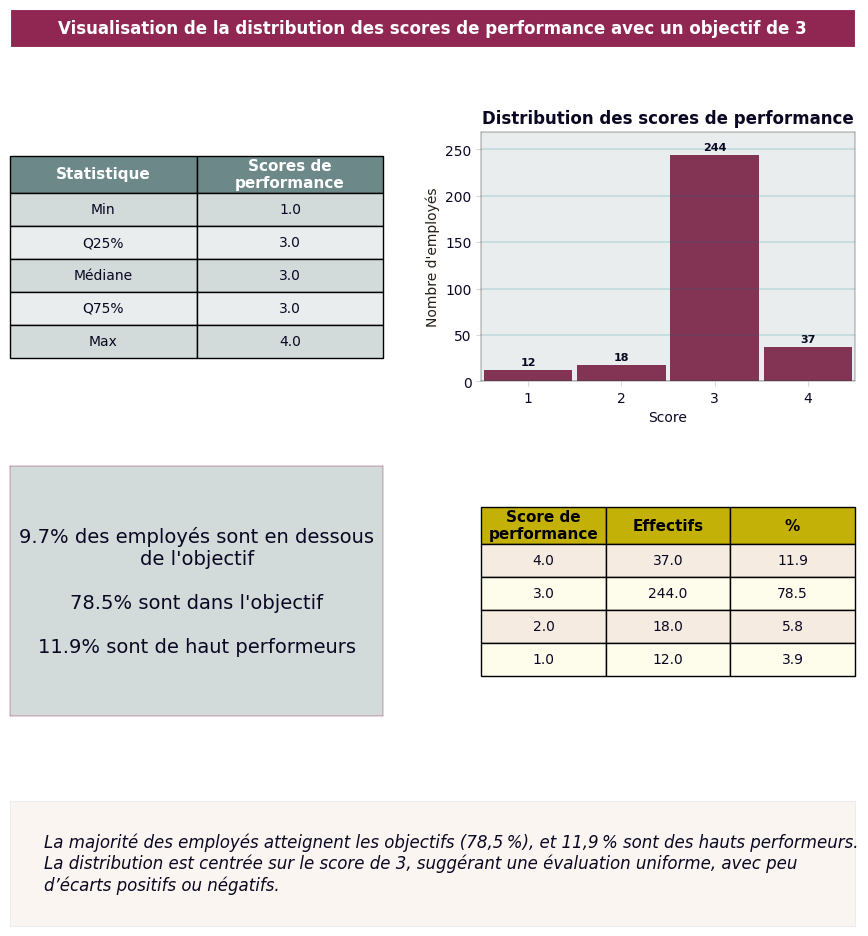

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap



#Visualisation performances
fig2 = plt.figure(figsize=(10, 10))

gs2 = gridspec.GridSpec(nrows=4, ncols=2, height_ratios=[0.15, 1, 1, 0.5]) 

# Créer les subplots 
ax4 = fig2.add_subplot(gs2[0, :])    
ax5 = fig2.add_subplot(gs2[1, 0])  
ax6 = fig2.add_subplot(gs2[1, 1])
ax7 = fig2.add_subplot(gs2[2, 0])
ax8 = fig2.add_subplot(gs2[2, 1])
ax8b = fig2.add_subplot(gs2[3, :]) # Conclusion
#-----------------------------------------Axe 1 : Titre--------------------------------------------------------------
ax4.set_xticks([])
ax4.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax4.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax4.set_facecolor((144/255,39/255,83/255)) #rose
ax4.text(0.5, 0.5, #positions x, y 

        'Visualisation de la distribution des scores de performance avec un objectif de 3',  

        fontsize=12, #taille 

        color='white', #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 

        weight='bold'
        )


# --------------------------------------Axe 2 : Tableau des quartilles---------------------------------------------
ax5.axis('off')
table = ax5.table(cellText=perf.values, colLabels=perf.columns,
                  loc='center', cellLoc='center', 
                  colColours=['#f5f5f5']*len(perf.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Appliquer des couleurs personnalisées pour les en-têtes
for (i, j), cell in table.get_celld().items():
    if i == 0:  # En-tête
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor((108/255,136/255,137/255))
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=11)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également
        cell.set_height(0.15)
    else:  # Corps du tableau
        if i % 2 == 0:  # Lignes paires
            cell.set_facecolor((233/255,237/255,237/255))
        else:  # Lignes impaires
            cell.set_facecolor((210/255,218/255,218/255))
        
        cell.set_text_props(color=(9/255,7/255,34/255))
        # Utilisation de textwrap pour couper le texte
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=10)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également

# -----------------------------------------------Axe 3 : Bar plot de distribution des scores----------------------------------
tab_perf_ascending=tab_perf.sort_values(by='Score de performance',ascending=True)
barplot_perf=sns.barplot(data=tab_perf_ascending,
                         x='Score de performance',
                         y='Effectifs',
                         ax=ax6,
                         width=0.95,
                         color=(144/255,39/255,83/255))
ax6.set_title('Distribution des scores de performance',color=(9/255,7/255,34/255),weight='bold')
ax6.set_xlabel('Score', color=(9/255,7/255,34/255))  
ax6.set_ylabel('Nombre d\'employés',color=(39/255,30/255,22/255)) 
ax6.set_facecolor((233/255,237/255,237/255))  
ax6.set_ylim(0, ax6.get_ylim()[1] * 1.05)  # Augmente la hauteur de 5%
for spine in ax6.spines.values(): #couleur bordures
    spine.set_color((39/255,30/255,22/255))
    spine.set_linewidth(0.3)
ax6.grid(True, axis='y', which='major', linewidth=0.2, color='teal')
ax6.tick_params(axis='both', 
                labelcolor=(9/255,7/255,34/255), 
                color=(210/255,218/255,218/255))#couleur des axes

# Ajouter des labels aux barres
barplot_perf.bar_label(barplot_perf.containers[0],
                       labels=tab_perf_ascending['Effectifs'],
                       label_type='edge', padding=2,
                       color=(9/255,7/255,34/255),
                       fontsize=8, weight='bold')



# -------------------------------------------Axe 4 : Affichage des % des top et under performers--------------------------------
ax7.set_xticks([])
ax7.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax7.spines.values():  # Supprime les bordures des subplots
    spine.set_color((9/255,7/255,34/255))
ax7.set_facecolor((210/255,218/255,218/255))
for spine in ax7.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
wrapped_perf_en_dessous = textwrap.fill(f'{tab_perf.iloc[2,2]+tab_perf.iloc[3,2]}% des employés sont en dessous de l\'objectif', width=35)
wrapped_dans_objectif=textwrap.fill(f'{tab_perf.iloc[1,2]}% sont dans l\'objectif', width=38)
wrapped_haut_performers=textwrap.fill(f'{tab_perf.iloc[0,2]}% sont de haut performeurs', width=38)
wrapped_text_combined = wrapped_perf_en_dessous + "\n\n" + wrapped_dans_objectif + "\n\n" + wrapped_haut_performers
ax7.text(0.5, 0.5,wrapped_text_combined, ha='center', va='center', fontsize=14, color=(9/255,7/255,34/255))

#---------------------------------------Axe 5 : Tableau de distribution des scores---------------------------------
ax8.axis('off')  # axe désactivé
table = ax8.table(cellText=tab_perf.values, colLabels=tab_perf.columns, loc='center')

# Personnalisation des styles (couleurs et alignement)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Appliquer des couleurs personnalisées pour les en-têtes
for (i, j), cell in table.get_celld().items():
    if i == 0:  # En-tête
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor((196/255,177/255,8/255))
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=11)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également
        cell.set_height(0.15)
        
    else:  # Corps du tableau
        if i % 2 == 0:  # Lignes paires
            cell.set_facecolor((254/255,252/255,235/255))
        else:  # Lignes impaires
            cell.set_facecolor((245/255,235/255,224/255))
        
        cell.set_text_props(color=(9/255,7/255,34/255))
        # Utilisation de textwrap pour couper le texte
        wrapped_text = textwrap.fill(cell.get_text().get_text(), width=10)  # Ajuster la largeur à tes besoins
        cell.set_text_props(text=wrapped_text, ha='center', va='center')  # Centrer également
        
#----------------------------------------------Conclusion------------------------------------------------------------------
ax8b.set_xticks([])
ax8b.set_yticks([])
for spine in ax8b.spines.values():  
    spine.set_color((233/255,237/255,237/255)) 
wrapped8b = textwrap.fill(f"La majorité des employés atteignent les objectifs (78,5 %), et 11,9 % sont des hauts performeurs. La distribution est centrée sur le score de 3, suggérant une évaluation uniforme, avec peu d’écarts positifs ou négatifs.",
                          width=97.5)
ax8b.set_ylim(0,10)
ax8b.set_xlim(0,10)
ax8b.set_facecolor((250/255, 245/255, 240/255))
ax8b.text(0.4,#x
         5, #y
         wrapped8b,
         fontsize=12,
         color=(9/255,7/255,34/255),  # couleur
         ha='left',  # alignement horizontal
         va='center',  # alignement vertical
         fontstyle='italic')  # style

# Ajuster les espacements
plt.tight_layout(pad=3)

# Afficher la figure
plt.show()


**Mesure de la satisfaction et engagement:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* % des employés avec un score de 4 ou 5.  
* % des employés avec un score de 2 ou 1.  
* Affichage de la distribution de l'engagement et la satisfaction.

In [59]:
#calcul des indicateurs de satisfaction et engagement
#colonnes : EngagementSurvey et EmpSatisfaction

data['EmpSatisfaction'].describe() #==>boite à moustache
data['EngagementSurvey'].describe() #==>boite à moustache

#distribution scores satisfaction pour les employés encore en poste:
employes_actifs=data.loc[data['DateofTermination'].isna()]
tableau_satisfaction=employes_actifs.groupby('EmpSatisfaction')['EmpSatisfaction'].count()
tableau_satisfaction=tableau_satisfaction.to_frame()
tableau_satisfaction = tableau_satisfaction.rename(columns={'EmpSatisfaction': 'effectifs'})
tableau_satisfaction.reset_index(inplace=True)
tableau_satisfaction = tableau_satisfaction.rename(columns={'EmpSatisfaction': 'Score de satisfaction'})
tableau_satisfaction['frequence']=tableau_satisfaction['effectifs']/len(employes_actifs)

tableau_engagement=employes_actifs.copy()
tableau_engagement['Score engagement']=pd.cut(tableau_engagement['EngagementSurvey'], bins=5,labels=[1,2,3,4,5])
tableau_engagement=tableau_engagement.groupby('Score engagement')['Score engagement'].count()
tableau_engagement=tableau_engagement.to_frame()
tableau_engagement=tableau_engagement.rename(columns={'Score engagement':'effectifs'})
tableau_engagement['frequence']=tableau_engagement['effectifs']/len(employes_actifs)
tableau_engagement.reset_index(inplace=True)
tableau_engagement








C:\Users\mlleI\AppData\Local\Temp\ipykernel_25580\1043481427.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tableau_engagement=tableau_engagement.groupby('Score engagement')['Score engagement'].count()


,Score engagement,effectifs,frequence
0,1,4,0.019324
1,2,8,0.038647
2,3,26,0.125604
3,4,62,0.299517
4,5,107,0.516908


In [60]:
import scipy.stats as st
import numpy as np
pearson=st.pearsonr(employes_actifs["EmpSatisfaction"],employes_actifs["EngagementSurvey"])[0]
cov=np.cov(employes_actifs["EmpSatisfaction"],employes_actifs["EngagementSurvey"],ddof=0)[1,0]


In [61]:
employes_actifs['engagement_class']=pd.cut(employes_actifs['EngagementSurvey'], bins=[0,1,2,3,4,5])
employes_actifs['engagement_class'].unique()

C:\Users\mlleI\AppData\Local\Temp\ipykernel_25580\4160545646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employes_actifs['engagement_class']=pd.cut(employes_actifs['EngagementSurvey'], bins=[0,1,2,3,4,5])


[(4, 5], (3, 4], (1, 2], (2, 3]]
Categories (5, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]

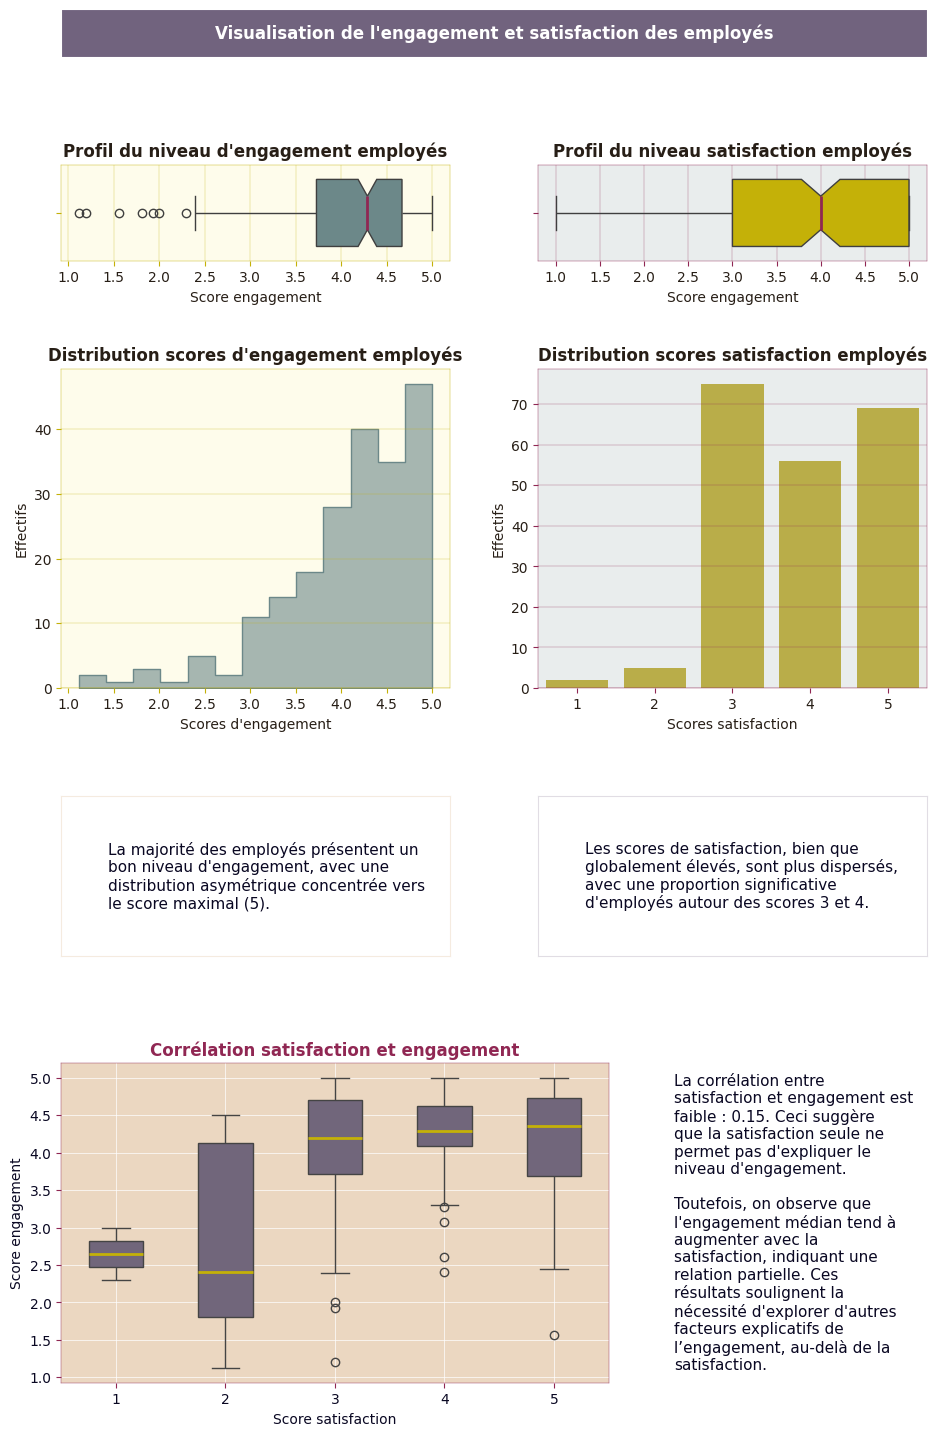

In [62]:
import mplcursors #rendre le graphique intéractif
import numpy as np
# Créer la figure et le gridspec 

fig3 = plt.figure(figsize=(10, 15)) 

gs3 = gridspec.GridSpec(nrows=5, ncols=6, height_ratios=[0.15, 0.3, 1,0.5,1]) #config ratios en colonnes et lignes 

# Créer les subplots 

ax9 = fig3.add_subplot(gs3[0, :])  # titre en haut

ax10 = fig3.add_subplot(gs3[1, 0:3])  #boite à moustache engagement

ax11 = fig3.add_subplot(gs3[1, 3:6])   #boite à moustache satisfaction

ax12 = fig3.add_subplot(gs3[2, 0:3])   #distribution engagement

ax13 = fig3.add_subplot(gs3[2, 3:6])   #distribution satisfaction

ax12b = fig3.add_subplot(gs3[3, 0:3])   #distribution engagement

ax13b = fig3.add_subplot(gs3[3, 3:6])   #distribution satisfaction

ax14 = fig3.add_subplot(gs3[4, 0:4])   #correl engagement satisfaction

ax15 = fig3.add_subplot(gs3[4, 4:6])   #texte

#-----------------------------------------------Axe 1 : Titre ----------------------------------------------

ax9.set_xticks([])
ax9.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax9.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax9.set_facecolor((113/255,99/255,126/255)) 
ax9.text(0.5, 0.5, #positions x, y 

        'Visualisation de l\'engagement et satisfaction des employés',  

        fontsize=12, #taille 

        color='white', #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )

# -----------------------------------------Axe 2 : boite à moustache engagement---------------------------------------------
boite_engagement=sns.boxplot(data=employes_actifs, 
                            x='EngagementSurvey', 
                            ax=ax10,
                            width=0.7, 
                            notch=True,
                            boxprops={"facecolor": (108/255,136/255,137/255)},
                            medianprops={"color": (144/255,39/255,83/255), "linewidth": 2},)
ax10.set_title('Profil du niveau d\'engagement employés',color=(39/255,30/255,22/255),weight='bold')
ax10.set_xlabel('Score engagement', color=(39/255,30/255,22/255))  
ax10.set_facecolor((254/255,252/255,235/255))  
for spine in ax10.spines.values(): #couleur bordures
    spine.set_color((196/255,177/255,8/255))
    spine.set_linewidth(0.3)
ax10.grid(True, axis='x', which='major', linewidth=0.2, color=(196/255,177/255,8/255))
ax10.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(196/255,177/255,8/255))#couleur des axes

# -----------------------------------------Axe 3 : boite à moustache satisfaction------------------------------------------
boite_satisfaction=sns.boxplot(data=employes_actifs, 
                            x='EmpSatisfaction', 
                            ax=ax11,
                            width=0.7, 
                            notch=True,
                            boxprops={"facecolor": (196/255,177/255,8/255)},
                            medianprops={"color": (144/255,39/255,83/255), "linewidth": 2},)
ax11.set_title('Profil du niveau satisfaction employés',color=(39/255,30/255,22/255),weight='bold')
ax11.set_xlabel('Score engagement', color=(39/255,30/255,22/255))  
ax11.set_facecolor((233/255,237/255,237/255))  
for spine in ax11.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax11.grid(True, axis='x', which='major', linewidth=0.2, color=(144/255,39/255,83/255))
ax11.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(144/255,39/255,83/255))#couleur des axes

#---------------------------------------------Axe 4 : distributions engagement ---------------------------------------    
sns.histplot(
    data=employes_actifs, x="EngagementSurvey",element="step",
    stat="count", common_norm=False, ax=ax12, color=(108/255,136/255,137/255), alpha=0.6
)
ax12.set_title('Distribution scores d\'engagement employés',weight='bold', color=(39/255,30/255,22/255))
ax12.set_ylabel('Effectifs', color=(39/255,30/255,22/255))
ax12.set_xlabel('Scores d\'engagement', color=(39/255,30/255,22/255))
ax12.set_facecolor((254/255,252/255,235/255))  
for spine in ax12.spines.values(): #couleur bordures
    spine.set_color((196/255,177/255,8/255))
    spine.set_linewidth(0.3)
ax12.grid(True, axis='y', which='major', linewidth=0.2, color=(196/255,177/255,8/255))
ax12.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(196/255,177/255,8/255))#couleur des axes

#------------------------------------------Axe 5 : distributions satisfaction ------------------------------------------     
sns.barplot(
    data=tableau_satisfaction, x="Score de satisfaction", y='effectifs',
    ax=ax13, color=(196/255,177/255,8/255), alpha=0.8
)
ax13.set_title('Distribution scores satisfaction employés',weight='bold', color=(39/255,30/255,22/255))
ax13.set_ylabel('Effectifs', color=(39/255,30/255,22/255))
ax13.set_xlabel('Scores satisfaction', color=(39/255,30/255,22/255))
ax13.set_facecolor((233/255,237/255,237/255))  
for spine in ax13.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax13.grid(True, axis='y', which='major', linewidth=0.2, color=(144/255,39/255,83/255))
ax13.tick_params(axis='both', labelcolor=(39/255,30/255,22/255), color=(144/255,39/255,83/255))#couleur des axes
#----------------------------------------------- Axe 6/7: Texte ----------------------------------------------------------
wrapped7b=textwrap.fill(f"La majorité des employés présentent un bon niveau d'engagement, avec une distribution asymétrique concentrée vers le score maximal (5). ",
                       width=40)

ax12b.text(0.12, 0.5,wrapped7b, ha='left', va='center', fontsize=11, color=(9/255,7/255,34/255))
ax12b.set_xticks([])
ax12b.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax12b.spines.values():  # Supprime les bordures des subplots
    spine.set_color((245/255,235/255,224/255))
ax12b.set_facecolor('white') 

wrapped8b=textwrap.fill(f"Les scores de satisfaction, bien que globalement élevés, sont plus dispersés, avec une proportion significative d'employés autour des scores 3 et 4. ",
                       width=40)

ax13b.text(0.12, 0.5,wrapped8b, ha='left', va='center', fontsize=11, color=(9/255,7/255,34/255))
ax13b.set_xticks([])
ax13b.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax13b.spines.values():  # Supprime les bordures des subplots
    spine.set_color((225/255,221/255,228/255))
ax13b.set_facecolor('white') 

#------------------------------------------Axe 8 : corrélation engagement satisfaction-------------------------------
sns.boxplot(data=employes_actifs, x='EmpSatisfaction', y='EngagementSurvey',
            ax=ax14, 
            width=0.5, 
            color=(113/255,99/255,126/255),
            medianprops={"color": (196/255,177/255,8/255), "linewidth": 2}
            )
ax14.set_title('Corrélation satisfaction et engagement',weight='bold', color=(144/255,39/255,83/255))
ax14.set_ylabel('Score engagement', color=(9/255,7/255,34/255))
ax14.set_xlabel('Score satisfaction', color=(9/255,7/255,34/255))
ax14.set_facecolor((235/255,215/255,193/255))  
for spine in ax14.spines.values(): #couleur bordures
    spine.set_color((144/255,39/255,83/255))
    spine.set_linewidth(0.3)
ax14.grid(True, axis='both', which='major', linewidth=0.5, color='white')
ax14.tick_params(axis='both', labelcolor=(9/255,7/255,34/255), color=(144/255,39/255,83/255))#couleur des axes

#----------------------------------------------- Axe 9: Texte ----------------------------------------------------------
wrapped7=textwrap.fill(f"La corrélation entre satisfaction et engagement est faible : {cov:.2f}. Ceci suggère que la satisfaction seule ne permet pas d'expliquer le niveau d'engagement. ",
                       width=30)
wrapped8=textwrap.fill(f"Toutefois, on observe que l'engagement médian tend à augmenter avec la satisfaction, indiquant une relation partielle. Ces résultats soulignent la nécessité d'explorer d'autres facteurs explicatifs de l’engagement, au-delà de la satisfaction.",
                       width=30)
wrapped_combo=wrapped7+'\n\n'+wrapped8
ax15.text(-0.1, 0.5,wrapped_combo, ha='left', va='center', fontsize=11, color=(9/255,7/255,34/255))
ax15.set_xticks([])
ax15.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
for spine in ax15.spines.values():  # Supprime les bordures des subplots
    spine.set_color('white')
ax15.set_facecolor('white') 


mplcursors.cursor(hover=True)
# Ajuster les espacements
plt.tight_layout(pad=3)
# Afficher la figure
plt.show()

In [63]:
#recherche des facteurs améliorant l'engagement (projets, manageur, génération (DOB),departement et salaire)
annalyse_engagement = employes_actifs.loc[:, ['PerfScoreID','EngagementSurvey','Salary', 'Position', 'DOB', 'Department', 'ManagerID', 'SpecialProjectsCount']]
annee_naissance = pd.DatetimeIndex(annalyse_engagement['DOB']).year

#création d'une colonne génération
annalyse_engagement['Generation'] = pd.cut(annee_naissance, bins=[1946,1964, 1980, 1996], 
                                           labels=['Baby boomers', 'X generation', 'Millennials'])

# classifier l'engagement
bins_engagement = [0,1, 2, 3, 4, 5]
annalyse_engagement['engagement_class'] = pd.cut(annalyse_engagement['EngagementSurvey'], bins=bins_engagement)

intervals_engagement = pd.IntervalIndex.from_breaks(bins_engagement)
bin_engagement_mids = intervals_engagement.mid

interval_to_mid = dict(zip(intervals_engagement, bin_engagement_mids))

annalyse_engagement['engagement_class'] = annalyse_engagement['engagement_class'].map(lambda x: interval_to_mid.get(x, np.nan))

annalyse_engagement['engagement_class']=annalyse_engagement['engagement_class'].astype(int)

# convertir manger id en entier
annalyse_engagement['ManagerID']=annalyse_engagement['ManagerID'].astype(int)

#séparer les différents poste en cadre /non cadre
mots_cles_cadre = [
    'manager', 'engineer', 'director', 'responsable', 'lead',
    'architect', 'chief', 'ceo', 'cio', 'head','senior', 'sr.', 'vp'
]

annalyse_engagement['type_poste'] = annalyse_engagement['Position'].str.lower().apply(
    lambda x: 'cadre' if any(keyword in x for keyword in mots_cles_cadre) else 'non cadre'
)

annalyse_engagement['type_poste'] = annalyse_engagement['type_poste'].astype('string')


annalyse_engagement.info()
annalyse_engagement['Generation'].unique()




<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PerfScoreID           207 non-null    int64         
 1   EngagementSurvey      207 non-null    float64       
 2   Salary                207 non-null    int64         
 3   Position              207 non-null    object        
 4   DOB                   207 non-null    datetime64[ns]
 5   Department            207 non-null    object        
 6   ManagerID             207 non-null    int64         
 7   SpecialProjectsCount  207 non-null    int64         
 8   Generation            207 non-null    category      
 9   engagement_class      207 non-null    int64         
 10  type_poste            207 non-null    string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(2), string(1)
memory usage: 18.1+ KB


['Millennials', 'X generation', 'Baby boomers']
Categories (3, object): ['Baby boomers' < 'X generation' < 'Millennials']

Afin de rechercher des facteurs influençant le niveau d'engagement et de performance des employés, on utilise les médianes de chacun pour plus de lisibilité.  
Pour cela on utilise la fonction d'agrégation "groupby()" pour chacun des éléments qu'on souhaite analyser.

In [64]:
#etude de l'engagement et performances medians en fonctions des salaires, nbr projets, position, departement, manageur, generation

# 1/ Salaire
#mettre le salaire en classes avec 1 valeur centrale pour chaque classe

# Étape 1 : définir les bins
bins_salaire = [45000, 65500, 86000, 106500, 127000, 147500, 168000, 188500, 209000, 229500, 250000]

# Étape 2 : couper en classes (on garde les labels=False pour obtenir les indices)
annalyse_engagement['salary_class'] = pd.cut(
    annalyse_engagement['Salary'], 
    bins=bins_salaire, 
    labels=False,
    include_lowest=True,
    duplicates='drop'
)

# Étape 3 : calculer les milieux des classes
bin_salaire_mids = pd.IntervalIndex.from_breaks(bins_salaire).mid

# Étape 4 : associer chaque indice au milieu correspondant
annalyse_engagement['salary_class'] = annalyse_engagement['salary_class'].map(lambda x: bin_salaire_mids[x] if pd.notna(x) else np.nan)

#calculer perf et engagement median en fonction du salaire
salaire_engage=annalyse_engagement.groupby('salary_class')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()

# 2/ Projets
projets_engage=annalyse_engagement.groupby('SpecialProjectsCount')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()

# 3/ type de poste
cadres_engage=annalyse_engagement.groupby('type_poste')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()

# 3/ departement
department_engage=annalyse_engagement.groupby('Department')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()
# 3/ Manageur
manager_engage=annalyse_engagement.groupby('ManagerID')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()

# 3/ Generation
generation_engage=annalyse_engagement.groupby('Generation')[['engagement_class',
                                                               'PerfScoreID']].median().reset_index()


C:\Users\mlleI\AppData\Local\Temp\ipykernel_25580\3071887321.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generation_engage=annalyse_engagement.groupby('Generation')[['engagement_class',


C:\Users\mlleI\AppData\Local\Temp\ipykernel_25580\4270201304.py:389: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax23.set_xticklabels(generations,fontdict=font_tick, rotation=45)


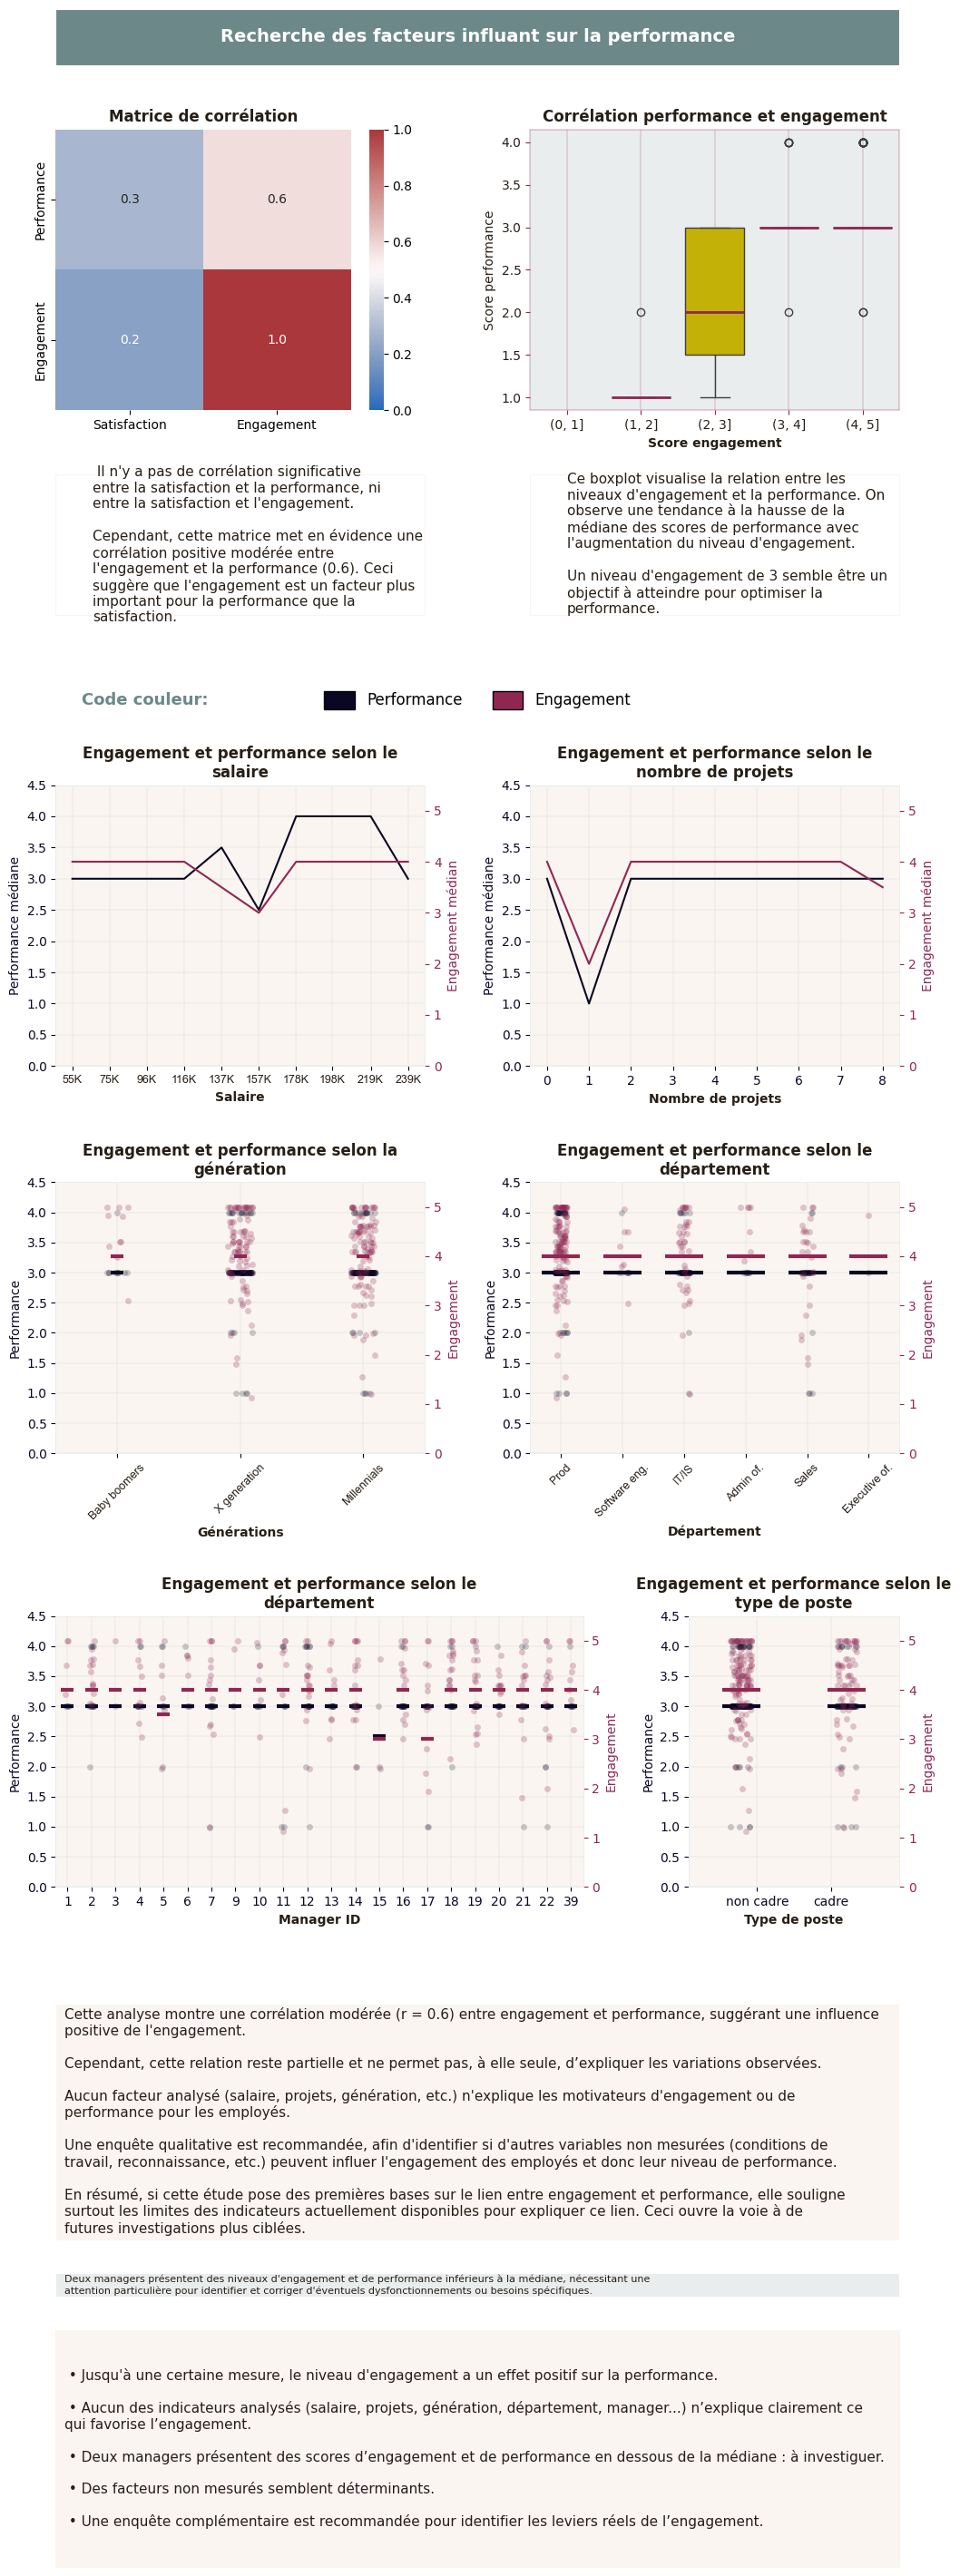

In [65]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap
from matplotlib.patches import Patch

#----------------------------------------palette couleurs--------------------------------------
colors = {
    'magenta': (144/255, 39/255, 83/255),
    'gold': (196/255, 177/255, 8/255),
    'slate_gray': (108/255, 136/255, 137/255),
    'oxford_blue': (9/255, 7/255, 34/255),
    'almond': (235/255, 215/255, 193/255),
    'chinese_violet': (113/255, 99/255, 126/255),
    'brown': (39/255, 30/255, 22/255),
    'light_slate_gray': (233/255, 237/255, 237/255),
    'less_light_slate_gray': (210/255, 218/255, 218/255),
    'light_gold': (254/255, 252/255, 235/255),
    'less_light_gold': (245/255, 235/255, 224/255),
    'light_chinese_violet': (225/255, 221/255, 228/255),
    'less_light_chinese_violet': (214/255, 210/255, 218/255),
    'pink_lavender': (219/255, 178/255, 209/255),
    'lin' : (250/255, 245/255, 240/255),
}

#-----------------------------------Tracé figure----------------------------------------------------
fig4 = plt.figure(figsize=(12, 30))

# Grille principale divisée en 3 grandes zones
gs_main = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1.5, 1, 0.8], hspace=0.15)

# === ZONE 1 : ax16 à ax22 === (ajout d'une ligne pour la légende)
gs_zone1 = gridspec.GridSpecFromSubplotSpec(
    5, 6,  # 5 lignes maintenant
    subplot_spec=gs_main[0],
    height_ratios=[0.2, 1, 0.5, 0.15, 1],  # ligne 3 pour légende
    hspace=0.4, wspace=2
)

ax16 = fig4.add_subplot(gs_zone1[0, :])         # Titre
ax17 = fig4.add_subplot(gs_zone1[1, 0:3])       # Matrice engagement/satisfaction/performance
ax18 = fig4.add_subplot(gs_zone1[1, 3:6])       # Boxplot engagement/performance
ax19 = fig4.add_subplot(gs_zone1[2, 0:3])       # Texte
ax20 = fig4.add_subplot(gs_zone1[2, 3:6])       # Texte

# Légende partagée juste avant les graphes
ax_legend_shared = fig4.add_subplot(gs_zone1[3, :])
ax_legend_shared.axis('off')
# Titre de la légende
ax_legend_title = fig4.add_subplot(gs_zone1[3, 0:1])
ax_legend_title.axis('off')
ax_legend_title.text(0.5, 0.5, "Code couleur: ", ha='left', va='center', fontsize=13, fontweight='bold', color=colors['slate_gray'])

legend_elements = [
    Patch(facecolor=colors['oxford_blue'], edgecolor='black', label='Performance'),
    Patch(facecolor=colors['magenta'], edgecolor='black', label='Engagement'),
]

ax_legend_shared.legend(
    handles=legend_elements,
    loc='center',
    ncol=2,
    frameon=False,
    fontsize=12,
    handleheight=1.5
)

ax21 = fig4.add_subplot(gs_zone1[4, 0:3])       # Salaire
ax22 = fig4.add_subplot(gs_zone1[4, 3:6])       # Nombre de projets

# === ZONE 2 : ax23 à ax26 ===
gs_zone2 = gridspec.GridSpecFromSubplotSpec(2, 6, subplot_spec=gs_main[1], hspace=0.6, wspace=2)
ax23 = fig4.add_subplot(gs_zone2[0, 0:3])       # Génération
ax24 = fig4.add_subplot(gs_zone2[0, 3:6])       # Département
ax25 = fig4.add_subplot(gs_zone2[1, 0:4])       # Manager
ax26 = fig4.add_subplot(gs_zone2[1, 4:6])       # Cadre / non cadre

# === ZONE 3 : ax27 à ax29 ===
gs_zone3 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs_main[2], height_ratios=[1, 0.1, 1], hspace=0.2, wspace=2)
ax27 = fig4.add_subplot(gs_zone3[0])            # Conclusion
ax28 = fig4.add_subplot(gs_zone3[1])            # Note
ax29 = fig4.add_subplot(gs_zone3[2])            # Résumé

# Ajustements globaux
fig4.subplots_adjust(top=0.97, bottom=0.03)



#---------------------------------------Fonctions-----------------------------------------------
#__________zone de texte
#créer une zone de text avec textwrap
"""Ex:
wrapped1=textwrap.fill(f"",width=130)
wrapped2=textwrap.fill(f"",width=130)

wrapped_combo=wrapped1+'\n\n'+wrapped2"""

# rentrer le numéro de l'axe, x, y, la zone de texte, la tialle de la police, les couleurs du texte, bordures et de fond

def zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor) :
    ax.text(x, y,
          wrapped_combo, #texte
          ha='left',
          va='center',
          fontsize=fontsize,
          color=text_color)
    ax.set_xticks([])
    ax.set_yticks([])  # suppresion axes
    for spine in ax.spines.values():  
        spine.set_color(spine_color) #couleur bordure
    ax.set_facecolor(facecolor) #couleur de fond
    
def titre(ax, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  # On désactive l'axe pour qu'il n'y ait pas de graphique
    for spine in ax.spines.values():  # Supprime les bordures des subplots
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(0.5, 0.5, #positions x, y 

        titre_wrapp,  

        fontsize=14, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )


#-----------------------------------------Axe 1 : Titre----------------------------------------- 
wrapped_titre=textwrap.fill(f"Recherche des facteurs influant sur la performance",width=130)
titre(ax16, 'white', colors['slate_gray'], wrapped_titre, 'white')

#------------------------- Axe 2 : #matrice engagement satisfaction performance----------------------

ax17.set_title('Matrice de corrélation',color=colors['brown'],weight='bold')
perf_sat_eng = employes_actifs.loc[:,['EngagementSurvey', 'EmpSatisfaction','PerfScoreID']] 
perf_sat_eng=perf_sat_eng.rename(columns={'EngagementSurvey':'Engagement',
                                          'EmpSatisfaction':'Satisfaction', 
                                          'PerfScoreID':'Performance' })
perf_sat_eng
corr_matrix = perf_sat_eng.corr()
# Sélectionner les corrélations
corr_series = corr_matrix.loc[['Performance', 'Engagement'], ['Satisfaction', 'Engagement']]
# Créer la heatmap
sns.heatmap(corr_series, annot=True, cmap='vlag', fmt='.1f', vmin=0, vmax=1, ax=ax17)



#---------------------------- Axe 3 : box plot engagement performance---------------------------
# Création du relplot
sns.boxplot(
    x='engagement_class', 
    y='PerfScoreID', 
    flierprops={"marker": "o"},
    boxprops={"facecolor": colors['gold']},
    medianprops={"color": colors['magenta'], "linewidth": 2},  
    data=employes_actifs,
    ax=ax18
)

ax18.set_title('Corrélation performance et engagement',color=colors['brown'],weight='bold')
ax18.set_xlabel('Score engagement', color=colors['brown'], weight='bold')
ax18.set_ylabel('Score performance', color=colors['brown'])   
ax18.set_facecolor(colors['light_slate_gray'])  
for spine in ax18.spines.values(): 
    spine.set_color(colors['magenta'])#couleur bordures
    spine.set_linewidth(0.3)
ax18.grid(True, axis='x', which='major', linewidth=0.2, color=(144/255,39/255,83/255))
ax18.tick_params(axis='both', 
                 labelcolor=colors['brown'], 
                 color=colors['magenta'])#couleur des axes


#------------------------------------ Ax 4/5 : texte--------------------------------------------------
wrapped9=textwrap.fill(f" Il n'y a pas de corrélation significative entre la satisfaction et la performance, ni entre la satisfaction et l'engagement.",
                       width=45)
wrapped10=textwrap.fill(f"Cependant, cette matrice met en évidence une corrélation positive modérée entre l'engagement et la performance (0.6). Ceci suggère que l'engagement est un facteur plus important pour la performance que la satisfaction.",
                       width=45)
wrapped_combo2=wrapped9+'\n\n'+wrapped10

zone_commentaires(ax19, 0.1, 0.5, wrapped_combo2, 11, colors['brown'], colors['lin'], 'white')

wrapped11=textwrap.fill(f"Ce boxplot visualise la relation entre les niveaux d'engagement et la performance. On observe une tendance à la hausse de la médiane des scores de performance avec l'augmentation du niveau d'engagement.",
                       width=45)
wrapped12=textwrap.fill(f"Un niveau d'engagement de 3 semble être un objectif à atteindre pour optimiser la performance.",
                       width=45)
wrapped_combo3=wrapped11+'\n\n'+wrapped12

zone_commentaires(ax20, 0.1, 0.5, wrapped_combo3, 11, colors['brown'], colors['lin'], 'white')


#-------------------------------Axe 6 : salaire median engagement performance--------------------------
# Tracer les deux nuages de points
sns.lineplot(data=salaire_engage, 
                x='salary_class', 
                y='PerfScoreID',
                ax=ax21,
                color=colors['oxford_blue'],
                label='performance',
                legend=False,
                )
ax21b = ax21.twinx()
sns.lineplot(data=salaire_engage, 
                x='salary_class', 
                y='engagement_class',  
                ax=ax21b,
                color=colors['magenta'],
                legend=False,
                label='engagement')

#titre
wrapped13=textwrap.fill(f"Engagement et performance selon le salaire",
                       width=35)

ax21.set_title(wrapped13,
               weight='bold', color=colors['brown']) 

ax21.set_facecolor(colors['lin'])

# Axe Y principal
ax21.set_ylabel('Performance médiane', color=colors['oxford_blue'])  
ax21.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax21.set_ylim(0, 4.5)

    
# Axe Y secondaire

ax21b.set_ylabel('Engagement médian', color=colors['magenta'])  
ax21b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax21b.set_ylim(0, 5.5)
    
#Forcer les 10 valeurs de l’axe X
ax21.set_xlabel('Salaire', color=colors['brown'], weight='bold') 
salary_ticks = [55250, 75750, 96250, 116750, 137250, 157750, 178250, 198250, 219250, 239750]
ax21.set_xticks(salary_ticks)
font_tick = {'family': 'Arial', 'size': 9, 'color': colors['brown']}

# Axe X: formatage
ax21.set_xticklabels([f"{int(x/1000)}K" for x in salary_ticks], fontdict=font_tick)

#bordures
for spine in ax21.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax21b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax21.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])
    
     
#-----------------------------------Axe 7 : nombre de projets----------------------------------------- 
# Tracer les deux nuages de points
sns.lineplot(data=projets_engage, 
                x='SpecialProjectsCount', 
                y='PerfScoreID',
                ax=ax22,
                color=(9/255,7/255,34/255),
                legend=False,
                label='performance')
ax22b = ax22.twinx()
sns.lineplot(data=projets_engage, 
                x='SpecialProjectsCount', 
                y='engagement_class',  
                ax=ax22b,
                color=(144/255,39/255,83/255),
                legend=False,
                label='engagement')

#titre
wrapped14=textwrap.fill(f"Engagement et performance selon le nombre de projets",
                       width=35)

ax22.set_title(wrapped14,
               weight='bold', color=colors['brown']) 

ax22.set_facecolor(colors['lin'])

# Axe Y principal
ax22.set_ylabel('Performance médiane', color=colors['oxford_blue'])  
ax22.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax22.set_ylim(0, 4.5)
    
# Axe Y secondaire

ax22b.set_ylabel('Engagement médian', color=colors['magenta'])  
ax22b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax22b.set_ylim(0, 5.5)
    
#Axe X
ax22.set_xlabel('Nombre de projets', color=colors['brown'],weight='bold') 


#bordures
for spine in ax22.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax22b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax22.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])

#-------------------------------------------- Axe 8 : generation-----------------------------------

#tracé
sns.stripplot(x=annalyse_engagement['Generation'],
           y=annalyse_engagement['PerfScoreID'],
           color=colors['oxford_blue'], 
           dodge=True, 
           alpha=.2, 
           legend=False,
           label='performance',
           ax=ax23
)

sns.pointplot(data=generation_engage, 
                x='Generation', 
                y='PerfScoreID',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=10, 
                markeredgewidth=3,
                color=colors['oxford_blue'],
                legend=False,
                ax=ax23
                )

ax23b = ax23.twinx()

sns.stripplot(x=annalyse_engagement['Generation'],
           y=annalyse_engagement['EngagementSurvey'], 
           color=colors['magenta'], 
           dodge=True, 
           alpha=.25, 
           legend=False,
           label='engagement',
           ax=ax23b         
)

sns.pointplot(data=generation_engage, 
                x='Generation', 
                y='engagement_class',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=10, 
                markeredgewidth=3,
                legend=False,
                ax=ax23b,
                color=colors['magenta']
                )

wrapped17=textwrap.fill(f"Engagement et performance selon la génération",
                       width=35)

ax23.set_title(wrapped17,
               weight='bold', color=colors['brown']) 

ax23.set_facecolor(colors['lin'])

# Axe Y principal
ax23.set_ylabel('Performance', color=colors['oxford_blue'])  
ax23.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax23.set_ylim(0, 4.5)
    
# Axe Y secondaire
ax23b.set_ylabel('Engagement', color=colors['magenta'])  
ax23b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax23b.set_ylim(0, 5.5)
    
#Axe X
ax23.set_xlabel('Générations', color=colors['brown'], weight='bold')
generations=['Baby boomers', 'X generation', 'Millennials'] 
ax23.set_xticklabels(generations,fontdict=font_tick, rotation=45)

#bordures
for spine in ax23.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax23b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax23.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])
    


#---------------------------------------------- Axe 9 : département-------------------------------------
#tracé
sns.stripplot(x=annalyse_engagement['Department'],
           y=annalyse_engagement['PerfScoreID'],
           color=colors['oxford_blue'], 
           dodge=True, 
           alpha=.2, 
           legend=False,
           label='performance',
           ax=ax24
)

sns.pointplot(data=department_engage, 
                x='Department', 
                y='PerfScoreID',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=30, 
                markeredgewidth=3,
                color=colors['oxford_blue'],
                legend=False,
                ax=ax24
                )

ax24b = ax24.twinx()

sns.stripplot(x=annalyse_engagement['Department'],
           y=annalyse_engagement['EngagementSurvey'], 
           color=colors['magenta'], 
           dodge=True, 
           alpha=.25, 
           legend=False,
           label='engagement',
           ax=ax24b         
)

sns.pointplot(data=department_engage, 
                x='Department', 
                y='engagement_class',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=30, 
                markeredgewidth=3,
                legend=False,
                ax=ax24b,
                color=colors['magenta'],
                )

#titre
wrapped16=textwrap.fill(f"Engagement et performance selon le département",
                       width=35)

ax24.set_title(wrapped16,
               weight='bold', color=colors['brown']) 

ax24.set_facecolor(colors['lin'])

# Axe Y principal
ax24.set_ylabel('Performance', color=colors['oxford_blue'])  
ax24.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax24.set_ylim(0, 4.5)
    
# Axe Y secondaire
ax24b.set_ylabel('Engagement', color=colors['magenta'])  
ax24b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax24b.set_ylim(0, 5.5)
    
#Axe X
ax24.set_xlabel('Département', color=colors['brown'], weight='bold')
departement_ticks = [0, 1, 2, 3, 4, 5]
departement_labels = ['Prod',  'Software eng.','IT/IS', 'Admin of.', 'Sales', 'Executive of.']
ax24.set_xticks(departement_ticks)
ax24.set_xticklabels(departement_labels, fontdict=font_tick, rotation=45)
ax24.tick_params(axis='x', labelrotation=45)  # Pivote les labels à 45 degrés



#bordures
for spine in ax24.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax24b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax24.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])
    



#------------------------------------------Axe 10 : manageur-----------------------------------
wrapped17=textwrap.fill(f"Engagement et performance selon le manageur",
                       width=35)

#tracé
sns.stripplot(x=annalyse_engagement['ManagerID'],
           y=annalyse_engagement['PerfScoreID'],
           color=colors['oxford_blue'], 
           dodge=True, 
           alpha=.2, 
           legend=False,
           label='performance',
           ax=ax25
)

sns.pointplot(data=manager_engage, 
                x='ManagerID', 
                y='PerfScoreID',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=10, 
                markeredgewidth=3,
                color=colors['oxford_blue'],
                legend=False,
                ax=ax25
                )

ax25b = ax25.twinx()

sns.stripplot(x=annalyse_engagement['ManagerID'],
           y=annalyse_engagement['EngagementSurvey'], 
           color=colors['magenta'], 
           dodge=True, 
           alpha=.25, 
           legend=False,
           label='engagement',
           ax=ax25b         
)

sns.pointplot(data=manager_engage, 
                x='ManagerID', 
                y='engagement_class',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=10, 
                markeredgewidth=3,
                ax=ax25b,
                legend=False,
                color=colors['magenta']
                )

#titre
ax25.set_title(wrapped16,
               weight='bold', color=colors['brown']) 

ax25.set_facecolor(colors['lin'])

# Axe Y principal
ax25.set_ylabel('Performance', color=colors['oxford_blue'])  
ax25.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax25.set_ylim(0, 4.5)
    
# Axe Y secondaire
ax25b.set_ylabel('Engagement', color=colors['magenta'])  
ax25b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax25b.set_ylim(0, 5.5)
    
#Axe X
ax25.set_xlabel('Manager ID', color=colors['brown'], weight='bold') 


#bordures
for spine in ax25.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax25b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax25.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])
    

#-------------------------------Axe 11 : type de position (cadre/non cadre)----------------------------
#tracé des deux axes
sns.stripplot(x=annalyse_engagement['type_poste'],
           y=annalyse_engagement['PerfScoreID'],
           color=colors['oxford_blue'], 
           dodge=True, 
           alpha=.2, 
           legend=False,
           label='performance',
           ax=ax26
)

sns.pointplot(data=cadres_engage, 
                x='type_poste', 
                y='PerfScoreID',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=30, 
                markeredgewidth=3,
                color=colors['oxford_blue'],
                legend=False,
                ax=ax26
                
                )

ax26b = ax26.twinx()

sns.stripplot(x=annalyse_engagement['type_poste'],
           y=annalyse_engagement['EngagementSurvey'], 
           color=colors['magenta'], 
           dodge=True, 
           alpha=.25, 
           legend=False,
           label='engagement',
           ax=ax26b         
)

sns.pointplot(data=cadres_engage, 
                x='type_poste', 
                y='engagement_class',
                linestyle="none", 
                errorbar=None,
                marker="_", 
                markersize=30, 
                markeredgewidth=3,
                ax=ax26b,
                color=colors['magenta'],
                legend=False
                )

#titre
wrapped15=textwrap.fill(f"Engagement et performance selon le type de poste",
                       width=35)

ax26.set_title(wrapped15,
               weight='bold', color=colors['brown']) 

ax26.set_facecolor(colors['lin'])

# Axe Y principal
ax26.set_ylabel('Performance', color=colors['oxford_blue'])  
ax26.tick_params(axis='both', labelcolor=colors['oxford_blue'], color=colors['oxford_blue'])
ax26.set_ylim(0, 4.5)
    
# Axe Y secondaire
ax26b.set_ylabel('Engagement', color=colors['magenta'])  
ax26b.tick_params(axis='y', labelsize=10, colors=colors['magenta'], labelcolor=colors['magenta'])
ax26b.set_ylim(0, 5.5)
    
#Axe X
ax26.set_xlabel('Type de poste', color=colors['brown'], weight='bold') 
ax26.set_xticks([0.15, 0.85])

#bordures
for spine in ax26.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

for spine in ax26b.spines.values():
    spine.set_color(colors['light_slate_gray'])
    spine.set_linewidth(0.5)

    
#   affichage grille
ax26.grid(True, axis='both', which='both', linewidth=0.3, color=colors['less_light_slate_gray'])

#----------------------------------Axe 12 texte---------------------------------------------------------------

wrapped18=textwrap.fill(f"Cette analyse montre une corrélation modérée (r = 0.6) entre engagement et performance, suggérant une influence positive de l'engagement.",
                       width=115)
wrapped19=textwrap.fill(f"Cependant, cette relation reste partielle et ne permet pas, à elle seule, d’expliquer les variations observées.",
                       width=115)

wrapped20=textwrap.fill(f"Aucun facteur analysé (salaire, projets, génération, etc.) n'explique les motivateurs d'engagement ou de performance pour les employés.",
                       width=115)
wrapped21=textwrap.fill(f"Une enquête qualitative est recommandée, afin d'identifier si d'autres variables non mesurées (conditions de travail, reconnaissance, etc.) peuvent influer l'engagement des employés et donc leur niveau de performance.",
                       width=115)
wrapped22=textwrap.fill(f"En résumé, si cette étude pose des premières bases sur le lien entre engagement et performance, elle souligne surtout les limites des indicateurs actuellement disponibles pour expliquer ce lien. Ceci ouvre la voie à de futures investigations plus ciblées.",
                       width=115)
wrapped_combo4=wrapped18+'\n\n'+wrapped19+'\n\n'+wrapped20+'\n\n'+wrapped21+'\n\n'+wrapped22

zone_commentaires(ax27, 0.01, 0.5, wrapped_combo4, 11, colors['brown'], 'white', colors['lin']) 

#----------------------------------Axe 13 note---------------------------------------------------------------
wrapped23=textwrap.fill(f"Deux managers présentent des niveaux d'engagement et de performance inférieurs à la médiane, nécessitant une attention particulière pour identifier et corriger d'éventuels dysfonctionnements ou besoins spécifiques.",
                       width=115)
zone_commentaires(ax28, 0.01, 0.5, wrapped23, 8, colors['brown'], 'white', colors['light_slate_gray']) 


#----------------------------------Axe 12 Recap---------------------------------------------------------------
bullet = '\u2022'#puce
wrapped24=textwrap.fill(f" {bullet} Jusqu'à une certaine mesure, le niveau d'engagement a un effet positif sur la performance.",
                       width=115)
wrapped25=textwrap.fill(f" {bullet} Aucun des indicateurs analysés (salaire, projets, génération, département, manager...) n’explique clairement ce qui favorise l’engagement.",
                       width=115)

wrapped26=textwrap.fill(f" {bullet} Deux managers présentent des scores d’engagement et de performance en dessous de la médiane : à investiguer.",
                       width=115)
wrapped27=textwrap.fill(f" {bullet} Des facteurs non mesurés semblent déterminants.",
                       width=115)
wrapped28=textwrap.fill(f" {bullet} Une enquête complémentaire est recommandée pour identifier les leviers réels de l’engagement.",
                       width=115)
wrapped_combo5=wrapped24+'\n\n'+wrapped25+'\n\n'+wrapped26+'\n\n'+wrapped27+'\n\n'+wrapped28
zone_commentaires(ax29, 0.01, 0.5, wrapped_combo5, 11, colors['brown'], colors['lin'], colors['lin']) 

# Afficher la figure
plt.show()

In [67]:
import os

# Créer un dossier 
os.makedirs("figures", exist_ok=True)

# Sauvegarder les figures individuellement en PNG
fig.savefig("figures/fig.png", dpi=300, bbox_inches='tight')
fig2.savefig("figures/fig2.png", dpi=300, bbox_inches='tight')
fig3.savefig("figures/fig3.png", dpi=300, bbox_inches='tight')
fig4.savefig("figures/fig4.png", dpi=300, bbox_inches='tight')


In [68]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("figures/all_figures.pdf") as pdf:
    pdf.savefig(fig, bbox_inches='tight')
    pdf.savefig(fig2, bbox_inches='tight')
    pdf.savefig(fig3, bbox_inches='tight')
    pdf.savefig(fig4, bbox_inches='tight')
